### Inferential Statistcs(Z and T distibution, Confidence interval)

#### Confidence interval for population mean calculation

##### Z- Distribution

sample size = 140, std = 2500, population mean = 1990

Interval estimate = Point estimate +/- Margin of error

point estimate = 1990

Margin of error  = Z* 2500/√( 140 ) 

In [97]:
# 90% confidence interval
a = 1990 - ((1.645 *211.20))
b = 1990 + ((1.645 *211.20))
print("90%: ",a, b)

# 95% confidence interval
x = 1990 - ((1.960 *211.20))
y = 1990 + ((1.960 *211.20))
print("95%: ",x, y)

# 99% confidence interval
x1 = 1990 - ((2.576 *211.20))
y1 = 1990 + ((2.576 *211.20))
print("99%: ",x1, y1)

90%:  1642.576 2337.424
95%:  1576.048 2403.952
99%:  1445.9488000000001 2534.0512


##### T - Distribution


sample size = 140, std = 2833, Sampling mean = 1990

Interval estimate = Point estimate +/- Margin of error

point estimate = 1990

Margin of error  = t * 2833/√( 140 ) 

In [104]:
# 90% confidence interval
a = 1990 - ((1.66 *239.46))
b = 1990 + ((1.66 *239.46))
print("90%: ",a, b)

# 95% confidence interval
x = 1990 - ((1.98 *239.46))
y = 1990 + ((1.98 *239.46))
print("95%: ",x, y)

# 99% confidence interval
x1 = 1990 - ((2.62 *239.46))
y1 = 1990 + ((2.62 *239.46))
print("99%: ",x1, y1)

90%:  1592.4964 2387.5036
95%:  1515.8692 2464.1308
99%:  1362.6147999999998 2617.3852


### Calculating Z and T values
#### Z/T values: confidence interval : 95%
#### Step 1: 100 - 95 = 5%
#### Step 2: 5% / 2  = 2.5
#### Step 3: 95 + 2.5 = 97.5
#### need to add 2.5 as python computes the area from left to right

In [105]:
# Z value
print("Z value for 99%",stats.norm.ppf(0.995))
print("Z value for 95%",stats.norm.ppf(0.975))
print("Z value for 90%",stats.norm.ppf(0.95))

Z value for 99% 2.5758293035489004
Z value for 95% 1.959963984540054
Z value for 90% 1.6448536269514722


In [106]:
# T values
print("T value for 99%",stats.t.ppf(0.995, df =100))
print("T value for 95%",stats.t.ppf(0.975, df =100))
print("T value for 90%",stats.t.ppf(0.95, df =100))

T value for 99% 2.6258905205863337
T value for 95% 1.9839715184496334
T value for 90% 1.66023432606575


#############################################################################################################################

### Problem Statement: 
Evaluate stocks of GLAXO and BEML.
The daily trading data (Open and Close Price)
For each stock is taken for the period starting from 2010 to 2016 from BSE site(www.bseindia.com)

Calculate: Confidence interval of everyday gain at 95 % for both the stocks

In [107]:
import pandas as pd
import numpy as np
from scipy import stats

In [108]:
beml_ = pd.read_csv("BEML.csv")
beml_.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [109]:
glaxo_ = pd.read_csv("GLAXO.csv")
glaxo_.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [110]:
beml_df = beml_[['Date', 'Close']]
glaxo_df = glaxo_[['Date', 'Close']]

In [111]:
#beml_df.set_index('Date', inplace=True)
#glaxo_df.set_index('Date', inplace=True)
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [112]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


#### Expected Daily returns on GLAXO

In [113]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)
#drop first row since it is NaN
beml_df = beml_df.dropna()


## Comparison of Expected daily returns by both Stocks

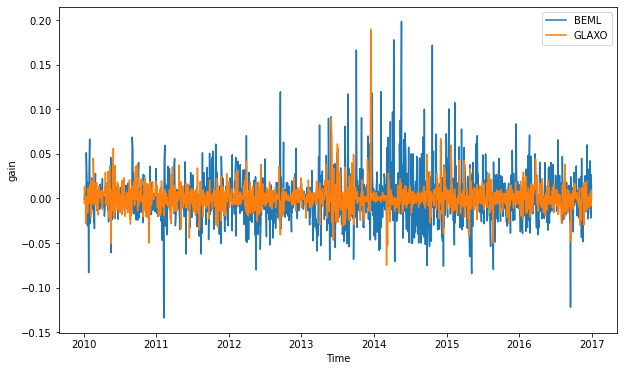

In [114]:
fig, axs = plt.subplots()
plt.plot(beml_df.index, beml_df.gain, label = "BEML")
plt.plot(glaxo_df.index, glaxo_df.gain, label = "GLAXO")
plt.xlabel('Time')
plt.ylabel('gain')
plt.legend()
fig.set_size_inches(10,6)

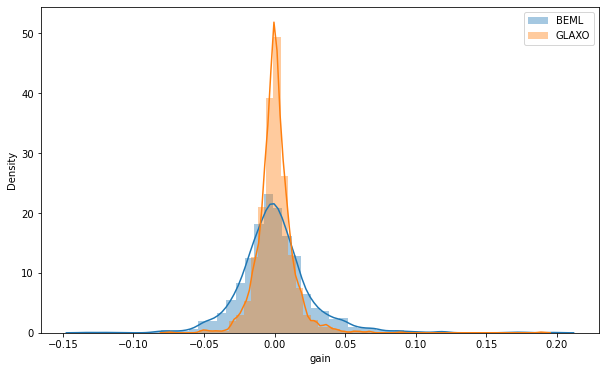

In [115]:
fig, ax = plt.subplots()
sn.distplot(beml_df.gain, label = "BEML", ax=ax)
sn.distplot(glaxo_df.gain, label = "GLAXO", ax=ax)
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
fig.set_size_inches(10,6)



### T - distibituon
#### Gain at Confidence Interval 95%

In [118]:
stats.norm.interval(0.95,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

(-0.025800133293883157, 0.02657221545906774)

In [119]:
stats.norm.interval(0.95,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

(-0.051532729680601415, 0.05207422583871588)